In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from config import DATA_PATH
import nltk
from nltk.corpus import stopwords

BASIC DATASET INFO
Dataset Shape: (1600000, 6)

Sentiment Distribution:
target
0    800000
4    800000
Name: count, dtype: int64

Positive Tweets: 800000
Negative Tweets: 800000


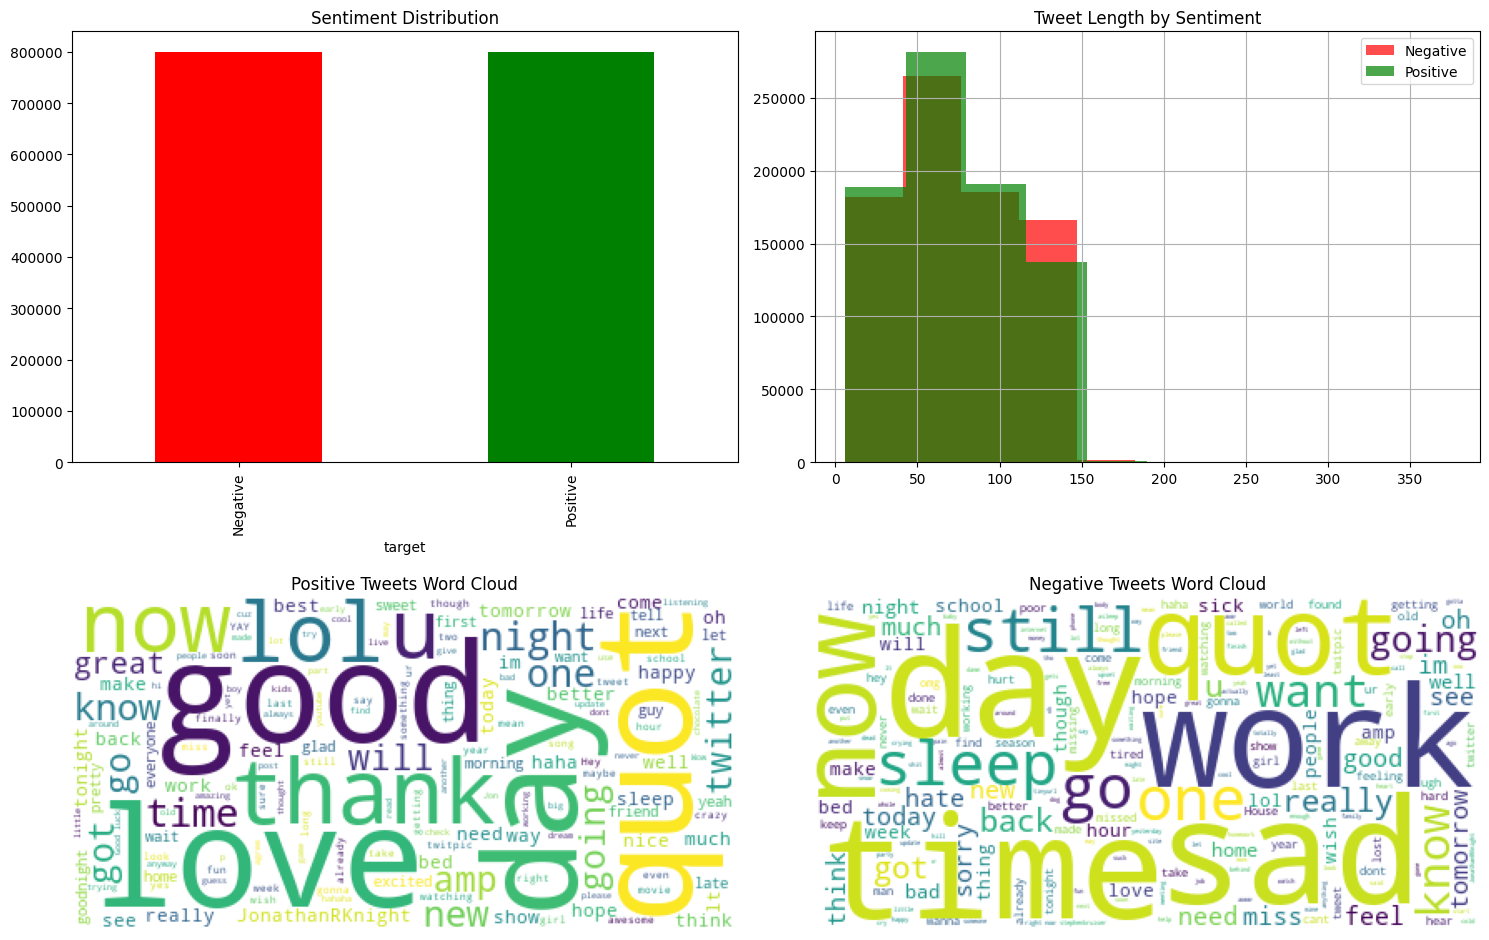


TOP WORDS ANALYSIS

Top words in Positive Tweets:
  good: 53593
  love: 44579
  like: 35871
  going: 29609
  thanks: 26142
  time: 22710
  &amp;: 21812
  great: 21081
  know: 20883
  back: 20346

Top words in Negative Tweets:
  like: 39553
  work: 34496
  going: 32681
  can't: 30613
  miss: 30345
  really: 29466
  want: 29203
  back: 29136
  still: 27938
  good: 23774


In [7]:
def perform_eda():
    
    columns_names = ['target','id','date','flag','user','text']
    df = pd.read_csv(DATA_PATH, encoding='ISO-8859-1', names=columns_names)
    
    
    print("="*50)
    print("BASIC DATASET INFO")
    print("="*50)
    print(f"Dataset Shape: {df.shape}")
    print(f"\nSentiment Distribution:")
    print(df['target'].value_counts())
    print(f"\nPositive Tweets: {(df['target']==4).sum()}")
    print(f"Negative Tweets: {(df['target']==0).sum()}")
    
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    
    df['target'].value_counts().plot(kind='bar', ax=axes[0,0], color=['red', 'green'])
    axes[0,0].set_title('Sentiment Distribution')
    axes[0,0].set_xticklabels(['Negative', 'Positive'])
    
    
    df['text_length'] = df['text'].str.len()
    df[df['target']==0]['text_length'].hist(ax=axes[0,1], alpha=0.7, color='red', label='Negative')
    df[df['target']==4]['text_length'].hist(ax=axes[0,1], alpha=0.7, color='green', label='Positive')
    axes[0,1].set_title('Tweet Length by Sentiment')
    axes[0,1].legend()
    
    
    positive_text = ' '.join(df[df['target']==4]['text'].head(1000))
    wordcloud_pos = WordCloud(width=400, height=200, background_color='white').generate(positive_text)
    axes[1,0].imshow(wordcloud_pos)
    axes[1,0].set_title('Positive Tweets Word Cloud')
    axes[1,0].axis('off')
    
    
    negative_text = ' '.join(df[df['target']==0]['text'].head(1000))
    wordcloud_neg = WordCloud(width=400, height=200, background_color='white').generate(negative_text)
    axes[1,1].imshow(wordcloud_neg)
    axes[1,1].set_title('Negative Tweets Word Cloud')
    axes[1,1].axis('off')
    
    plt.tight_layout()
    plt.savefig('eda_visualizations.png')
    plt.show()
    
   
    print("\n" + "="*50)
    print("TOP WORDS ANALYSIS")
    print("="*50)
    
    stop_words = set(stopwords.words('english'))
    
    def get_top_words(text_series, n=10):
        words = ' '.join(text_series).lower().split()
        words = [w for w in words if w not in stop_words and len(w) > 3]
        return Counter(words).most_common(n)
    
    print("\nTop words in Positive Tweets:")
    for word, count in get_top_words(df[df['target']==4]['text']):
        print(f"  {word}: {count}")
    
    print("\nTop words in Negative Tweets:")
    for word, count in get_top_words(df[df['target']==0]['text']):
        print(f"  {word}: {count}")
    
    return df

if __name__ == "__main__":
    df = perform_eda()